The goal of this research page is to try to see if the contructor has any effect on winning

We can achieve this by comparing categorical variable with categorical variable using the chi quared independece test

In [3]:
import pandas as pd
import scipy.stats as stats

In [4]:
df = pd.read_csv('/Users/cristianzuniga/Documents/GitHub/F1-Analysis/Ergast Data/races.csv')
df = df[['raceId', 'year', 'circuitId', 'name' ,'date']]
df = df.loc[df["year"] >= 2018]



df_results = pd.read_csv('/Users/cristianzuniga/Documents/GitHub/F1-Analysis/Ergast Data/results.csv')


df_results = df_results[['raceId', 'driverId', 'position', 'constructorId']].reset_index(drop=True)
df_results = df_results.rename(columns={"position":"result"})
df = df.merge(df_results, how="inner", on="raceId")
df["result"] = df["result"].astype(str)

In [5]:
df.head()

,raceId,year,circuitId,name,date,driverId,result,constructorId
0,989,2018,1,Australian Grand Prix,2018-03-25,20,1,6
1,989,2018,1,Australian Grand Prix,2018-03-25,1,2,131
2,989,2018,1,Australian Grand Prix,2018-03-25,8,3,6
3,989,2018,1,Australian Grand Prix,2018-03-25,817,4,9
4,989,2018,1,Australian Grand Prix,2018-03-25,4,5,1


In [6]:
driver = pd.read_csv("/Users/cristianzuniga/Documents/GitHub/F1-Analysis/Ergast Data/drivers.csv")

constructor = pd.read_csv("/Users/cristianzuniga/Documents/GitHub/F1-Analysis/Ergast Data/constructors.csv")
constructor = constructor[["constructorId", "name"]]
constructor = constructor.set_index('constructorId').to_dict()["name"]
df["constructor_name"] = df["constructorId"].apply(lambda x: constructor[x])

In [7]:
sample = df.sample(n=100)
sample.head()

,raceId,year,circuitId,name,date,driverId,result,constructorId,constructor_name
1810,1083,2022,9,British Grand Prix,2022-07-03,840,11,117,Aston Martin
1846,1085,2022,34,French Grand Prix,2022-07-24,846,7,1,McLaren
707,1024,2019,15,Singapore Grand Prix,2019-09-22,842,8,5,Toro Rosso
1107,1044,2020,5,Turkish Grand Prix,2020-11-15,846,8,1,McLaren
1208,1074,2022,3,Bahrain Grand Prix,2022-03-20,4,9,214,Alpine F1 Team


In [8]:
sample["constructor_name"].value_counts()

McLaren           14
Williams          11
Alfa Romeo        11
Ferrari           10
Red Bull          10
Mercedes           8
Haas F1 Team       7
Toro Rosso         6
Alpine F1 Team     5
AlphaTauri         5
Renault            5
Aston Martin       3
Racing Point       3
Sauber             2
Name: constructor_name, dtype: int64

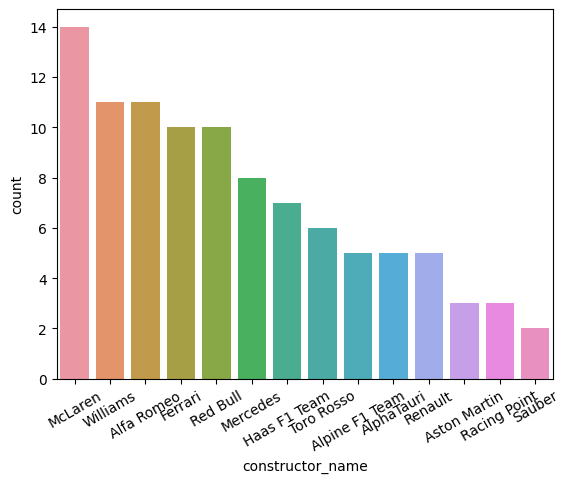

In [9]:
import seaborn as sns
import matplotlib.pyplot as plt
sns.countplot(data=sample, x="constructor_name", order=sample["constructor_name"].value_counts().index)
plt.xticks(rotation=30)
plt.show()

In [10]:

cross_table = pd.crosstab(sample["result"], sample["constructor_name"])
cross_table

constructor_name,Alfa Romeo,AlphaTauri,Alpine F1 Team,Aston Martin,Ferrari,Haas F1 Team,McLaren,Mercedes,Racing Point,Red Bull,Renault,Sauber,Toro Rosso,Williams
result,,,,,,,,,,,,,,
1,0,0,0,0,0,0,0,0,0,3,0,0,0,0
10,0,1,0,1,0,0,1,0,0,0,2,0,0,0
11,0,0,0,1,0,0,1,0,0,0,1,0,1,1
12,2,1,0,0,1,1,2,0,0,0,0,0,1,1
13,2,1,0,0,0,0,0,0,0,0,0,0,0,0
14,1,1,1,0,0,0,0,0,0,1,1,0,0,1
15,0,0,0,1,0,1,1,0,0,0,0,0,2,0
16,1,0,0,0,0,1,0,0,0,0,0,1,0,2
17,0,1,1,0,0,2,0,0,0,0,0,0,1,1


In [11]:

sample = sample[~(sample["result"] == r"\N")]

Null hypothesis: The contructor and the result of the race have no relationship
Alternative hypothesis: The construtor and the result of the race do have relationship

In [12]:
import scipy.stats as stats
test = stats.chi2_contingency(cross_table)
print(f"Chi statistics: {test[0]} with p-value {test[1]}")

Chi statistics: 309.0565605029891 with p-value 0.004436844140601441


If we're using a level of significance of 5%, then we must reject the null hypothesis. We can conclude, there is no relationship between the result of the race and the constructor.

Lets try winner instead of position.

In [13]:
def winner(x):
    if x == 1:
        return 1
    else:
        return 0
sample["Winner?"] = ''
#Need to drop values
sample = sample[~(sample["result"] == r"\N")]
sample["Winner?"] = sample["result"].astype(int).apply(lambda x: winner(x))
sample["Winner?"] = sample["Winner?"].astype(str)


Performing the Chi Square Test of independence between Constructor and Winner?

Null hypothesis: The contructor and the winner of the race have no relationship
Alternative hypothesis: The construtor and the winner of the race are related

In [14]:

cross_table = pd.crosstab(sample["Winner?"], sample["constructor_name"])
test = stats.chi2_contingency(cross_table)
print(f"Chi statistics: {test[0]} with p-value {test[1]}")

Chi statistics: 26.932978723404258 with p-value 0.012706640829541281


At a significance level of .05, we fail to reject the null hypothesis. We can conclude there is a relationship between the constructor and the winner of the race.